# (Super simple) Group analysis

There are many options for group/higher-level analyses. I'm only including the simplest of analyses here (i.e., a one-sample t-test). Check out the full [DartBrains tutorial](https://dartbrains.org/content/Group_Analysis.html) for an expanded discussion and tutorial on different types of higher-level analyses. 

Making group inferences with GLM requires combining results from lower-level analyses. This ends up being either really simply or more complex depending on the specific type of group analysis you want to perform. Here, we will look at the simple case: a one-sample t-test.

In [71]:
%matplotlib inline

import os
from glob import glob
import numpy as np
import nibabel as nib
from nltools.data import Brain_Data, Design_Matrix
from bids import BIDSLayout, BIDSValidator

In [65]:
# Dataset location
data_dir = '/Users/michael/Dropbox/work/data/dartbrains/data/localizer'
layout = BIDSLayout(data_dir,derivatives=True)

/opt/homebrew/Caskroom/miniforge/base/envs/pymri/lib/python3.10/site-packages/bids/layout/validation.py:156: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


In the [single subject tutorial](/2_glm_singlesubject.ipynb), we calculated a contrast between vidoe and audio conditions. Let's see if this contrast shows group-level differences. First, we will read in the result files from the first level analyses. I'm using the glob function which performs pattern matching using the * wildcard. Unfortunately, the `.layout()` method for pybids doesn't handle custom files in the derivatives directory (as we created in the first level analysis). So, we can do this manually with glob.

In [66]:
con_files = glob(os.path.join(data_dir,'derivatives','pyglm','*','*videoaudio*'))
con_files.sort()
con_files

['/Users/michael/Dropbox/work/data/dartbrains/data/localizer/derivatives/pyglm/sub-S01/sub-S01_task-localizer_glm-stim_videoaudio_contrast.nii.gz',
 '/Users/michael/Dropbox/work/data/dartbrains/data/localizer/derivatives/pyglm/sub-S02/sub-S02_task-localizer_glm-stim_videoaudio_contrast.nii.gz',
 '/Users/michael/Dropbox/work/data/dartbrains/data/localizer/derivatives/pyglm/sub-S03/sub-S03_task-localizer_glm-stim_videoaudio_contrast.nii.gz',
 '/Users/michael/Dropbox/work/data/dartbrains/data/localizer/derivatives/pyglm/sub-S04/sub-S04_task-localizer_glm-stim_videoaudio_contrast.nii.gz',
 '/Users/michael/Dropbox/work/data/dartbrains/data/localizer/derivatives/pyglm/sub-S05/sub-S05_task-localizer_glm-stim_videoaudio_contrast.nii.gz']

Reading in the files is performed with a call to `Brain_Data`.

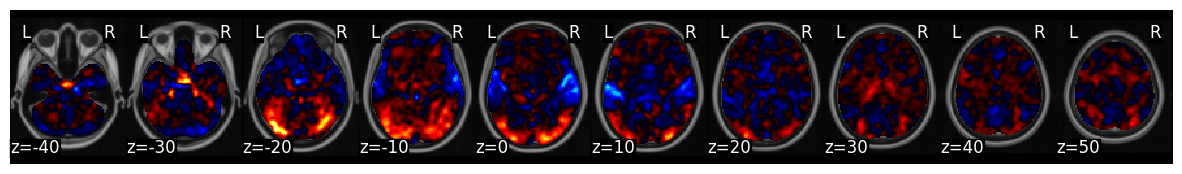

In [67]:
con_data = Brain_Data(con_files)
con_data.mean().plot()

We can already see in the means calculated across participants that there are clear differences with positive values (i.e., more activation for video) in occipital regions and negative values (i.e., more activation for audio) in superior temporal. Let's see if this is supported with statistical analyses. `Brain_Data` has a `ttest()` method for performing one-sample t-tests. That's it, that's all we have to do!

In [68]:
con_stats = con_data.ttest()
con_stats

{'t': nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 'p': nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)}

The output of `ttest()` is a dictionary of statistics (t and p values) across the brain. We can view these results with any plotting method. In the `iplot()` window below, the threshold is set to 3.1 to show only those voxels with stronger effects. Look for regions showing video > audio (i.e. positive t values) and audio > video (i.e., negative t values).

In [69]:
con_stats['t'].iplot(threshold=3.1)

interactive(children=(FloatText(value=3.1, description='Threshold'), HTML(value='Image is 3D', description='Vo…

To finish up, you could save the t and p maps and then create nice figures here using python tools or in a different viewer application. Of course, we haven't considered the important issue of multiple comparisons and how to appropriately threshold this image. There are many tools baked into nltools for performing [thresholding](https://dartbrains.org/content/Thresholding_Group_Analyses.html), check them out!